In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

c:\Users\Rajat Bansal\Desktop\Gen AI\LangGraph Tutorials\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [13]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model='gemini-3-flash-preview')

In [14]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [15]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [16]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [17]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

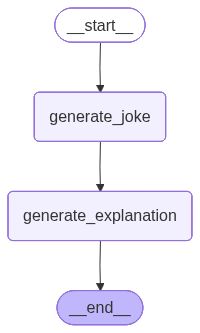

In [18]:
workflow

In [19]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': [{'type': 'text',
   'text': 'What’s the difference between a pizza and my jokes?\n\nMy jokes can’t be **topped**!',
   'extras': {'signature': 'EuUZCuIZAb4+9vurZjic9D5Ihf3Q1laJC9Sx9eZs9MfA2ZhQnGn0p/tCaFCyAZZX7N3d8gUm0UdEOK54XI26JTKHT0vaQjvvC6+ibt81LMmSoTFyupNX4ZEPaB2qmQUDP3rLfuAk0l0NaKzmXtHwMUOdVmvKfFIyzV5tNasyWd7blbAoR6Ue7T0v38iG5bkDL5wF/F+qRo/ND/4Rx/+Xd8zZojhL3xB6BTCPoL/EZHT7l4Gg+1X4EiazMJanqALllmWk1brQ+skzCKcR7vA9M6Nr0xnw0fa0PRZQFNuPsLTaAmELIEll5kBGKVI4fC4yuM+Hfmtu+9wdhkOYsvwLFmtu66Scf6Bsn3U4xO5A3g5K6c2Us2Xft/6X54ufSEQilfwyjhxBCxnKY3GZtMMN+NdVrhKqHogDxFf3ldKAR+58IizZoDVCF5il4E9iQyOjLs5c11b4DZ1RwR1ztwLBKOHDS+NUHO52LVbTDwLTDvx1wpH0slnP96YArqiuiTB25rvv8lZ5Bh/1d/MSCVO3O5w+ikMOpkVzE/abczXAUpik7CGJ2vLKgaBLkWQCefwynxRoMbUBfqPDNFTP8XmDnq/RGKd+nE87ViRI5H3PiWxvzgZ7ecoaX+FDxT0Agrwto5tXgnZK3amIlq79vsBFGFW8R7EywfEYNGEXo0P7gY6BtDIz6DGShc8e5dGtiIcbBIdq6unnmmForRb3kqpNTMwKdGWDbfsPh88V6esvFpr23k7jMm66PC/FwXmDh7JT2eKrc7TnJf9oKFiI/8qTyGVXv+j/1wmSSaypLGLnYH7ypJRyCHGxe9B4N4L

In [20]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': [{'type': 'text', 'text': 'What’s the difference between a pizza and my jokes?\n\nMy jokes can’t be **topped**!', 'extras': {'signature': 'EuUZCuIZAb4+9vurZjic9D5Ihf3Q1laJC9Sx9eZs9MfA2ZhQnGn0p/tCaFCyAZZX7N3d8gUm0UdEOK54XI26JTKHT0vaQjvvC6+ibt81LMmSoTFyupNX4ZEPaB2qmQUDP3rLfuAk0l0NaKzmXtHwMUOdVmvKfFIyzV5tNasyWd7blbAoR6Ue7T0v38iG5bkDL5wF/F+qRo/ND/4Rx/+Xd8zZojhL3xB6BTCPoL/EZHT7l4Gg+1X4EiazMJanqALllmWk1brQ+skzCKcR7vA9M6Nr0xnw0fa0PRZQFNuPsLTaAmELIEll5kBGKVI4fC4yuM+Hfmtu+9wdhkOYsvwLFmtu66Scf6Bsn3U4xO5A3g5K6c2Us2Xft/6X54ufSEQilfwyjhxBCxnKY3GZtMMN+NdVrhKqHogDxFf3ldKAR+58IizZoDVCF5il4E9iQyOjLs5c11b4DZ1RwR1ztwLBKOHDS+NUHO52LVbTDwLTDvx1wpH0slnP96YArqiuiTB25rvv8lZ5Bh/1d/MSCVO3O5w+ikMOpkVzE/abczXAUpik7CGJ2vLKgaBLkWQCefwynxRoMbUBfqPDNFTP8XmDnq/RGKd+nE87ViRI5H3PiWxvzgZ7ecoaX+FDxT0Agrwto5tXgnZK3amIlq79vsBFGFW8R7EywfEYNGEXo0P7gY6BtDIz6DGShc8e5dGtiIcbBIdq6unnmmForRb3kqpNTMwKdGWDbfsPh88V6esvFpr23k7jMm66PC/FwXmDh7JT2eKrc7TnJf9oKFiI/8qTyGVXv+j/1wmSSaypLGLnYH7yp

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': [{'type': 'text', 'text': 'What’s the difference between a pizza and my jokes?\n\nMy jokes can’t be **topped**!', 'extras': {'signature': 'EuUZCuIZAb4+9vurZjic9D5Ihf3Q1laJC9Sx9eZs9MfA2ZhQnGn0p/tCaFCyAZZX7N3d8gUm0UdEOK54XI26JTKHT0vaQjvvC6+ibt81LMmSoTFyupNX4ZEPaB2qmQUDP3rLfuAk0l0NaKzmXtHwMUOdVmvKfFIyzV5tNasyWd7blbAoR6Ue7T0v38iG5bkDL5wF/F+qRo/ND/4Rx/+Xd8zZojhL3xB6BTCPoL/EZHT7l4Gg+1X4EiazMJanqALllmWk1brQ+skzCKcR7vA9M6Nr0xnw0fa0PRZQFNuPsLTaAmELIEll5kBGKVI4fC4yuM+Hfmtu+9wdhkOYsvwLFmtu66Scf6Bsn3U4xO5A3g5K6c2Us2Xft/6X54ufSEQilfwyjhxBCxnKY3GZtMMN+NdVrhKqHogDxFf3ldKAR+58IizZoDVCF5il4E9iQyOjLs5c11b4DZ1RwR1ztwLBKOHDS+NUHO52LVbTDwLTDvx1wpH0slnP96YArqiuiTB25rvv8lZ5Bh/1d/MSCVO3O5w+ikMOpkVzE/abczXAUpik7CGJ2vLKgaBLkWQCefwynxRoMbUBfqPDNFTP8XmDnq/RGKd+nE87ViRI5H3PiWxvzgZ7ecoaX+FDxT0Agrwto5tXgnZK3amIlq79vsBFGFW8R7EywfEYNGEXo0P7gY6BtDIz6DGShc8e5dGtiIcbBIdq6unnmmForRb3kqpNTMwKdGWDbfsPh88V6esvFpr23k7jMm66PC/FwXmDh7JT2eKrc7TnJf9oKFiI/8qTyGVXv+j/1wmSSaypLGLnYH7y

In [22]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': [{'type': 'text',
   'text': 'What do you call a fake noodle?\n\nAn **impasta**!',
   'extras': {'signature': 'EuMQCuAQAb4+9vvn6sXYqd9i37l6XWTamBhx+A9n9gAXfCaiQiy4PPPVQ5c6Br6awuWNiJu7LL1tXLHeQIQkpIAMfTiFJamYJkSd68bmJbWqlyPbjnPKDQZFC884mnpDpQytnpHuBdGzRmiCUD4oDEnVvwG1Ig5rYH9KRHsrs/ceL1jEuJdu3PamdqIdv8royUl1KxbgkLMpxa79RdqvC7DHRVwgFtzCrL+WL7dylez/pcpeOrbBGvMEriM6EUb5sPVQ6svgQ7tSu83DnUC4RJwhLk1pi3cDjgaCT2QhAHCoXTOy3VjORtt7lOxb+JFPNdqTeJ4o6dI1s20vgsrhUsiDO/2PDkkgNUyBOUNyd5CZ30wIv7PYOsDORq0dXCOyI1yZZI+Sp3RhS3ZRe/AM6kQs3e//ZQa3XW7xKmCU6neYlERihniDKWVIyMc9Zfs9qBT61qV5Gut6oBq1EW1GMuo2FmE+nrfRegp9aZ8YWsNVk5DY0B7wzvC+0q1sbiWp+uIZKLrBriypfQKpvEPUqw5XiC3ikooRZjUB4MfaDYbH7Ak9JNrbNOin4Pcpz82ziisApY4/IbxE3UIJYvyah/lBDyJGHEi59abo3a1/K5EfLaHu3KT2IM85u42VPXojiGeurykvUbL5+HcaNyxLMVGhBy6TFDzRl05DdfZklSfv5BLeEPiJ125vlRr4229iIepnFJMvZYtONX8ZaLvXJmfHtnRiKCYVP+xIkHS7WMdTS1aAyMx5KD1aaZ+d0VGEJK5055bjXECSpReZJ1Yy9E/vhkV5TjSbmQOhIPAzGKC8EIHomoKLeMiWPe7QCzCebezFiU+MeDwX17Bxx5K8ikHuelbdi

## Time Travel

In [23]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f1033db-72ae-69f0-8000-4c8ff67c567c"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f1033db-72ae-69f0-8000-4c8ff67c567c'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-06T09:25:02.612734+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033db-72aa-6df9-bfff-04fc6b40e2e6'}}, tasks=(PregelTask(id='d08d33cb-5ba2-cf91-0d76-3b8d13f275c4', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': [{'type': 'text', 'text': 'What’s the difference between a pizza and my jokes?\n\nMy jokes can’t be **topped**!', 'extras': {'signature': 'EuUZCuIZAb4+9vurZjic9D5Ihf3Q1laJC9Sx9eZs9MfA2ZhQnGn0p/tCaFCyAZZX7N3d8gUm0UdEOK54XI26JTKHT0vaQjvvC6+ibt81LMmSoTFyupNX4ZEPaB2qmQUDP3rLfuAk0l0NaKzmXtHwMUOdVmvKfFIyzV5tNasyWd7blbAoR6Ue7T0v38iG5bkDL5wF/F+qRo/ND/4Rx/+Xd8zZojhL3xB6BTCPoL/EZHT7l4Gg+1X4EiazMJanqALllmWk1brQ+skzCKcR7vA9M6Nr0x

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f1033db-72ae-69f0-8000-4c8ff67c567c"}})

{'topic': 'pizza',
 'joke': [{'type': 'text',
   'text': 'I was going to tell you a joke about pizza... but it’s a little too **cheesy**.',
   'extras': {'signature': 'EvsYCvgYAb4+9vugdHPPWErOVfGGKVcBxk4MA6hpJCdMkvvEtxzkCOBsLUZONB683V9CMc57z3CvdH45guXidrsDligrstzJhe/t25gUom/Dmq3kQRLrGwPGeP6q3KULrl7YmhiUlDz7eoMr1cOHo8AVWCnANpb6kA13daCAXJROezd/7PErGUTZY0NL+fcQpthZfLSvk3/KvrXtdbvS4eyYNUpxvknvsbRCPScsgKPW28ejVihCGG/nfAdWTaw++BsENUHGkdPO05Ms4ATyXNyNNTcoybPUtYb/BB8fQnVut8LBci4ThxWKbq5NV6FI8oMl2t8Iwre4JbdT5zWEGBPXWn8oGHcG6ZoPMtQRz1RLvzh3+Doo8xTqp7tLrzxidiikq3Rig2KIy74AvjR0ECj7x047OQZGHJXjtyv4eM8xq2J616EJ3N4X2MTZkVb4kZzOJo6Au9mqPaS5ir06j8Xglv02qMeLT/UmxbYkKPiEOm1PqUgB3IrqZeHLiTaXK5+Qjm7mqlbOCYus7AIxYqFsTrpaZx/j9+JQHdkQWzHlVB/lvak15Pqg0QVoOuO1Bp3j8BLpI9bqBXMJdx6j6quyTHoHOh/s1ZA+6GupnoWT09Prqid04lVmYA8lOWOkrK5gIbM7Q1vfEIwATjWtWLJVyARqXq6or6EipEZRk+wYRbnyPm2/6tNXBmFWa91yaWvnHi0mZ9Zyj0YWyFTzlR+JyK3fK8ppFWn6TxEMgdkHOuvscDNrOr3QJYYaZ5+ceXxvpSY/VvmljYg9kcWmbgskbCWA5MVhSjk5USquZlVdvGGW5UT80wJxKAp7eTMm

In [25]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': [{'type': 'text', 'text': 'I was going to tell you a joke about pizza... but it’s a little too **cheesy**.', 'extras': {'signature': 'EvsYCvgYAb4+9vugdHPPWErOVfGGKVcBxk4MA6hpJCdMkvvEtxzkCOBsLUZONB683V9CMc57z3CvdH45guXidrsDligrstzJhe/t25gUom/Dmq3kQRLrGwPGeP6q3KULrl7YmhiUlDz7eoMr1cOHo8AVWCnANpb6kA13daCAXJROezd/7PErGUTZY0NL+fcQpthZfLSvk3/KvrXtdbvS4eyYNUpxvknvsbRCPScsgKPW28ejVihCGG/nfAdWTaw++BsENUHGkdPO05Ms4ATyXNyNNTcoybPUtYb/BB8fQnVut8LBci4ThxWKbq5NV6FI8oMl2t8Iwre4JbdT5zWEGBPXWn8oGHcG6ZoPMtQRz1RLvzh3+Doo8xTqp7tLrzxidiikq3Rig2KIy74AvjR0ECj7x047OQZGHJXjtyv4eM8xq2J616EJ3N4X2MTZkVb4kZzOJo6Au9mqPaS5ir06j8Xglv02qMeLT/UmxbYkKPiEOm1PqUgB3IrqZeHLiTaXK5+Qjm7mqlbOCYus7AIxYqFsTrpaZx/j9+JQHdkQWzHlVB/lvak15Pqg0QVoOuO1Bp3j8BLpI9bqBXMJdx6j6quyTHoHOh/s1ZA+6GupnoWT09Prqid04lVmYA8lOWOkrK5gIbM7Q1vfEIwATjWtWLJVyARqXq6or6EipEZRk+wYRbnyPm2/6tNXBmFWa91yaWvnHi0mZ9Zyj0YWyFTzlR+JyK3fK8ppFWn6TxEMgdkHOuvscDNrOr3QJYYaZ5+ceXxvpSY/VvmljYg9kcWmbgskbCWA5MVhSjk5USquZlVdvGGW5

## Updating State

In [26]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f1033db-72ae-69f0-8000-4c8ff67c567c", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f103421-e40e-6454-8001-dffe470c1171'}}

In [27]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f103421-e40e-6454-8001-dffe470c1171'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-02-06T09:56:33.549013+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033db-72ae-69f0-8000-4c8ff67c567c'}}, tasks=(PregelTask(id='b0b63d40-b072-f81c-dd0a-b91bd1308ec5', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': [{'type': 'text', 'text': 'I was going to tell you a joke about pizza... but it’s a little too **cheesy**.', 'extras': {'signature': 'EvsYCvgYAb4+9vugdHPPWErOVfGGKVcBxk4MA6hpJCdMkvvEtxzkCOBsLUZONB683V9CMc57z3CvdH45guXidrsDligrstzJhe/t25gUom/Dmq3kQRLrGwPGeP6q3KULrl7YmhiUlDz7eoMr1cOHo8AVWCnANpb6kA13daCAXJROezd/7PErGUTZY0NL+fcQpthZf

In [28]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f103421-e40e-6454-8001-dffe470c1171"}})

{'topic': 'samosa',
 'joke': [{'type': 'text',
   'text': 'Why did the samosa go to therapy?\n\nBecause it felt **empty inside**... until it met its "aloo" mate!',
   'extras': {'signature': 'ErkVCrYVAb4+9vuYnhj4fZy+tudeYp4G7q2URBSjittU2X/TVBAzVkt4R6CZD/bNjCAar288PBK31+AR7xARLyAxHGDkbRKV6WxYL1vHCRNRSLTW73bawhgJz8h1q7cBCVNDfKU1nPOj1sa8ZYkWKIoVIS+RSxx4QsKTvFGri7vH+NoWqZ8qpQ/VSN+SAAxhFOJv3ml2cix+DRbcRXlEWTGrL0959hcWU3Cbdoh6EZLRatf+calGxtLLP3D9RwsJSdYESLHyLWBRhRXRbLyuXSsSPJAjTLAJrmMomsUpfKqs8Jxaku2FGHbUJSFBh+K3niCn0o/8DiC2XPDcCAUZBgnp9+vVm+nH3vzkbcN+kp58EwR6Fkkv9S/XKK8TV3ube/d3r2AvYTNdZdDX2xqEFBMqfMppWfqwmoBcPZaW59YuRMtI0oa79xzV16f/P/5TqR3R8W3GdQhNOhCh64XnNr4b2Gf0z4p5NxUO72n2oWK8e8mSQjmAcmLLLTtVMwNkTs0MlMtxuevDY4VCgFoR1bt5OehVGiIlyUt76GRA3x2d6z3YdwLVZp465pLJeMdSJckqvbpbQC85x/oBq9x8O5VVMqPbdkTupk46dQC1XBKyc4+6qb8R4D3zLUorLu0m2piSQkzRzwJXoHZmtKeOim5AKDNlRaaUl4ZJ0hvapZ456hfznNq2CaM+6ixD+qKr8DUnrbAZbYi53Z+8iTo7pPigukjc1WOgMbB0a5hTsIXw0uKWEZLdaYyLiNCbK/qxDJ0AmNuXB1AZQQfRTvhSZ+yQNlsObY8n9DYzwQGP

In [29]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': [{'type': 'text', 'text': 'Why did the samosa go to therapy?\n\nBecause it felt **empty inside**... until it met its "aloo" mate!', 'extras': {'signature': 'ErkVCrYVAb4+9vuYnhj4fZy+tudeYp4G7q2URBSjittU2X/TVBAzVkt4R6CZD/bNjCAar288PBK31+AR7xARLyAxHGDkbRKV6WxYL1vHCRNRSLTW73bawhgJz8h1q7cBCVNDfKU1nPOj1sa8ZYkWKIoVIS+RSxx4QsKTvFGri7vH+NoWqZ8qpQ/VSN+SAAxhFOJv3ml2cix+DRbcRXlEWTGrL0959hcWU3Cbdoh6EZLRatf+calGxtLLP3D9RwsJSdYESLHyLWBRhRXRbLyuXSsSPJAjTLAJrmMomsUpfKqs8Jxaku2FGHbUJSFBh+K3niCn0o/8DiC2XPDcCAUZBgnp9+vVm+nH3vzkbcN+kp58EwR6Fkkv9S/XKK8TV3ube/d3r2AvYTNdZdDX2xqEFBMqfMppWfqwmoBcPZaW59YuRMtI0oa79xzV16f/P/5TqR3R8W3GdQhNOhCh64XnNr4b2Gf0z4p5NxUO72n2oWK8e8mSQjmAcmLLLTtVMwNkTs0MlMtxuevDY4VCgFoR1bt5OehVGiIlyUt76GRA3x2d6z3YdwLVZp465pLJeMdSJckqvbpbQC85x/oBq9x8O5VVMqPbdkTupk46dQC1XBKyc4+6qb8R4D3zLUorLu0m2piSQkzRzwJXoHZmtKeOim5AKDNlRaaUl4ZJ0hvapZ456hfznNq2CaM+6ixD+qKr8DUnrbAZbYi53Z+8iTo7pPigukjc1WOgMbB0a5hTsIXw0uKWEZLdaYyLiNCbK/qxDJ0AmNuXB1AZQQfRTvhSZ+yQN

## Fault Tolerance


In [2]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [3]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [4]:
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [5]:
builder = StateGraph(CrashState)

builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

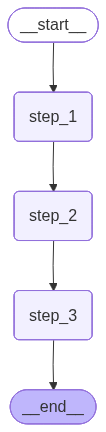

In [6]:
graph

In [7]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [8]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033cb-828b-62b5-8001-e6dc6d18a86a'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-02-06T09:17:54.779205+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033cb-8288-6ba5-8000-e370aebac472'}}, tasks=(PregelTask(id='497915ea-1bcd-7698-24ab-ec9e62de6e3e', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [10]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033cb-828b-62b5-8001-e6dc6d18a86a'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-02-06T09:17:54.779205+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033cb-8288-6ba5-8000-e370aebac472'}}, tasks=(PregelTask(id='497915ea-1bcd-7698-24ab-ec9e62de6e3e', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f1033cb-8288-6ba5-8000-e370aebac472'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-06T09:17:54.777206+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [11]:
graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})

⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed


{'input': 'start', 'step1': 'done', 'step2': 'done'}